In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('cleaned_data.csv')




array([[<Axes: title={'center': 'disc_year'}>]], dtype=object)

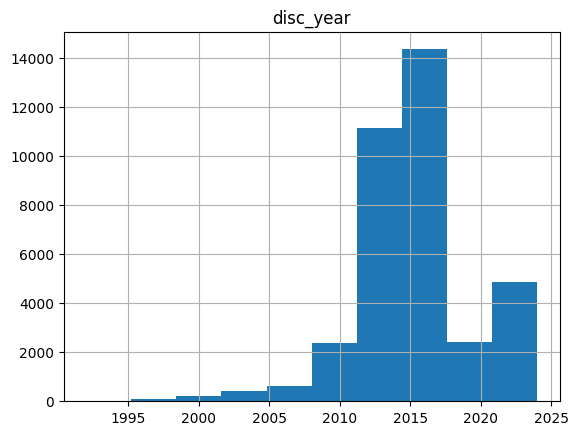

In [19]:
df.hist("disc_year")

In [20]:
df.head()

,loc_rowid,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,...,ra,decstr,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,rowupdate,pl_pubdate,releasedate
0,1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-07-23,2011-08,2014-07-23
1,2,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2014-05-14,2008-01,2014-05-14
2,3,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,...,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038,2023-09-19,2023-08,2023-09-19
3,4,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-09-04,2017-03,2018-09-06
4,5,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,...,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216,2018-04-25,2011-08,2014-07-23


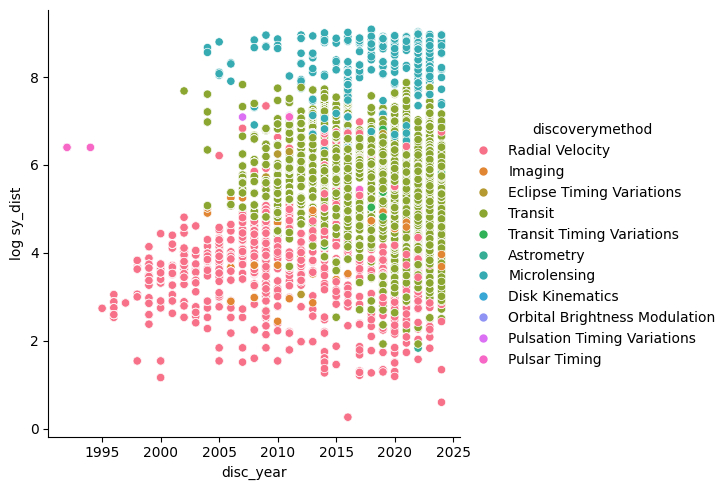

In [35]:
df['log sy_dist']=np.log(df['sy_dist'])
sns.relplot(data=df, x='disc_year', y='log sy_dist', hue='discoverymethod');

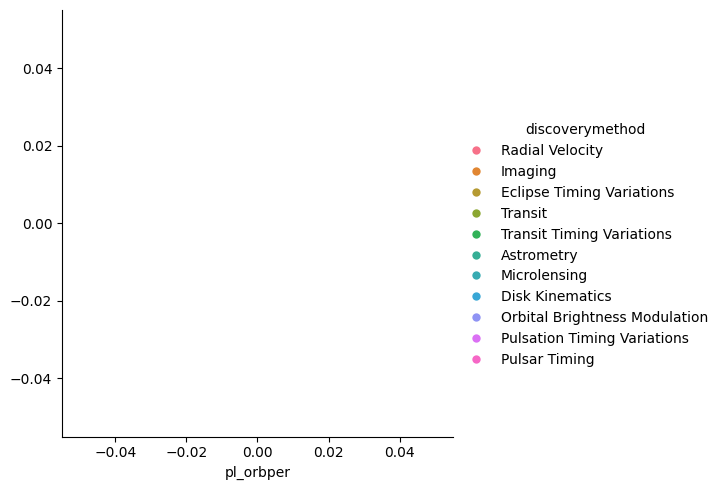

In [29]:
sns.relplot(data=df, x='pl_orbper', hue='discoverymethod');

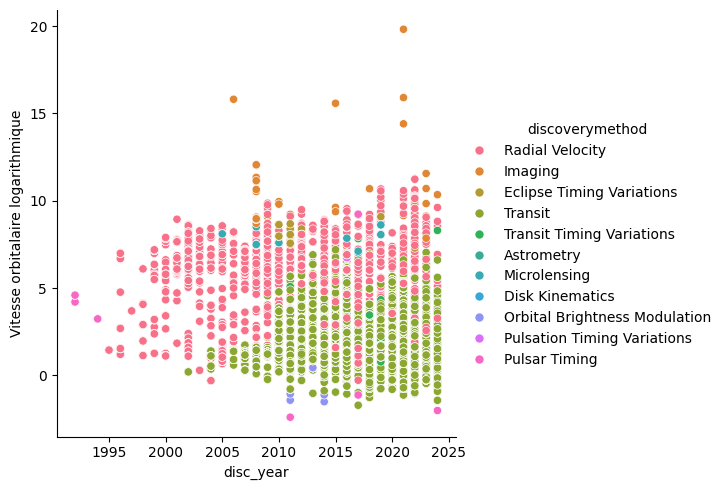

In [34]:
df['Vitesse orbitalaire logarithmique']=np.log(df['pl_orbper'])
sns.relplot(data=df, x='disc_year', y='Vitesse orbitalaire logarithmique', hue='discoverymethod');

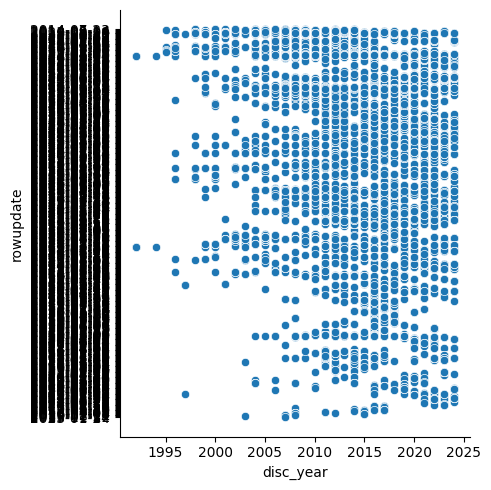

In [36]:
sns.relplot(data=df, x='disc_year', y='rowupdate');